In [11]:
from tensorflow import keras
model = keras.models.load_model('No_Feature.h5',custom_objects={'dice_loss': dice_loss,'dice_coef':dice_coef,'iou':iou})
model

In [18]:
import os
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision,Accuracy
from matplotlib import pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
H=256
W=256
dim=(H,W)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [40]:


def read_image(path):
    #path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x=cv2.resize(x, dim)
    x = x/255.0
    x = np.expand_dims(x, axis=0)
    return x

def read_mask(path):
    #path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x=cv2.resize(x, dim)
    x = x/255.0
    x = x > 0.5
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x


In [29]:
path="../input/kidney/case_00205/case_00205"
# load_data(path)

images = sorted(glob("../input/kidney/case_00205/case_00205/Images/*.png"))
segmentations=sorted(glob("../input/kidney/case_00205/case_00205/Segmentation/*.png"))
print(len(images),len(segmentations))


93 93


In [59]:
x=read_image(images[0])

In [70]:
y_actual=read_mask(segmentations[29])

In [72]:
y=model.predict(x)
y=y.reshape(256,256)

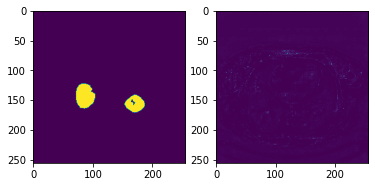

In [73]:
plt.subplot(122),plt.imshow(y)
plt.subplot(121),plt.imshow(y_actual)
plt.show()

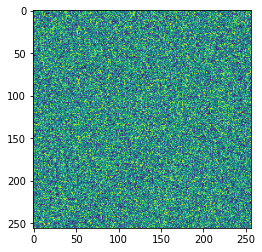